<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [48]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy

### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [6]:
## Write your code here

# Display column names and their data types
print("Column Names and Data Types:")
print(df.dtypes)

# Display summary information about the dataset
print("\nSummary Information:")
print(df.info())

# Display summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
print(df.describe())

Column Names and Data Types:
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

Summary Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

Summary Statistics for Numeric Columns:
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    163

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [37]:
## Write your code here

# Check for missing values in each column
missing_values = df.isnull().sum()

# Print the number of missing values per column
print("Missing Values per Column:")
print(missing_values)

# Calculate the mean of the 'ConvertedCompYearly' column (ignoring NaN values)
mean_value = df['ConvertedCompYearly'].mean()

# Fill missing values in 'ConvertedCompYearly' with the mean
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(mean_value)

# Fill missing RemoteWork with "Unknown"
df['RemoteWork'].fillna('Unknown', inplace=True)

# Drop rows where JobSat or YearsCodePro is missing (essential for analysis)
df = df.dropna(subset=['JobSat', 'YearsCodePro'])

# Convert YearsCodePro and JobSat to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')


Missing Values per Column:
ResponseId               0
MainBranch               0
Age                      0
Employment               0
RemoteWork               0
                      ... 
JobSatPoints_11        109
SurveyLength           378
SurveyEase             338
ConvertedCompYearly      0
JobSat                   0
Length: 114, dtype: int64


/tmp/ipykernel_1376/1815207109.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna('Unknown', inplace=True)


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [38]:
## Write your code here

# Calculate the value counts for the 'Employment' column
employment_counts = df['Employment'].value_counts()

# Calculate the value counts for the 'JobSat'
job_sat_counts = df['JobSat'].value_counts()

# Calculate the value counts for the 'YearsCodePro' 
years_code_pro_counts = df['YearsCodePro'].value_counts()

# Display the value counts for each column
print("Employment Distribution:")
print(employment_counts)

print("\nJob Satisfaction Distribution:")
print(job_sat_counts)

print("\nProfessional Coding Experience Distribution:")
print(years_code_pro_counts)

Employment Distribution:
Employment
Employed, full-time                                                                                                                                                                                                     21436
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                                                                 2213
Independent contractor, freelancer, or self-employed                                                                                                                                                                     1219
Employed, part-time                                                                                                                                                                                                       498
Employed, full-time;Student, part-time                                      

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


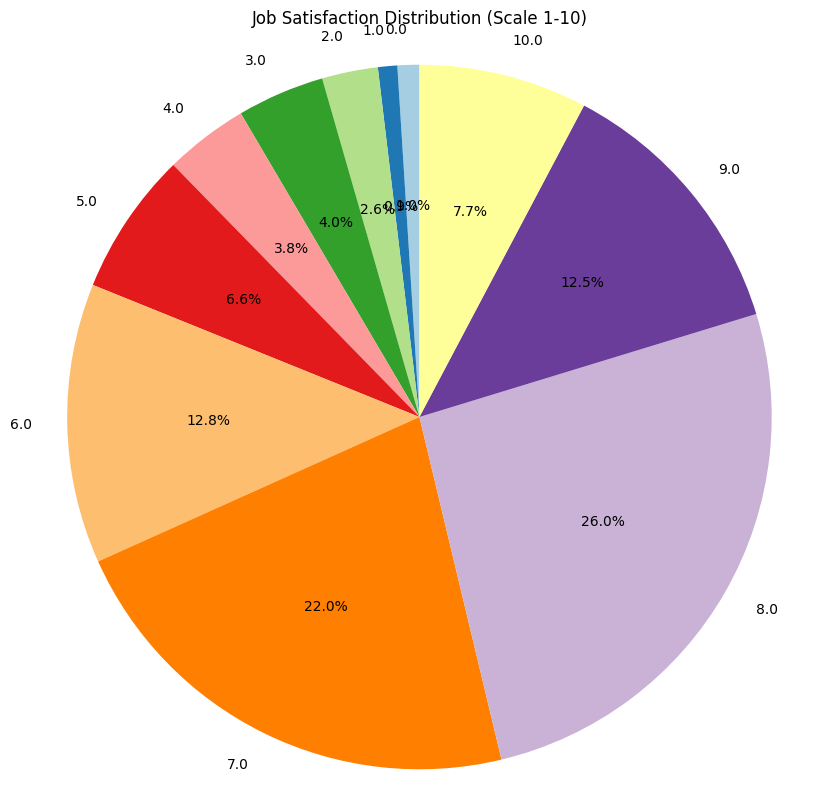

In [39]:
## Write your code here

job_sat_counts = df['JobSat'].value_counts().sort_index()

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(job_sat_counts, labels=job_sat_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Job Satisfaction Distribution (Scale 1-10)')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

# Display the plot
plt.show()

# Plot interpretation (based on a 1-10 scale): Most employees are satisfied.

# Very Satisfied (9-10): A total of 20.2% of employees report being very satisfied. Satisfied (6-8): A total of 60.8% of employees report being satisfied. Neutral (5): 6.6 % of employees are neutral, neither satisfied nor dissatisfied.
# Dissatisfied (3-4): A total of 7.8% of employees fall on the lower satisfaction levels. Very dissatisfied (0-2): A total of 4.45% of employees are very dissatisfied to varying degrees, which is a positive sign.


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


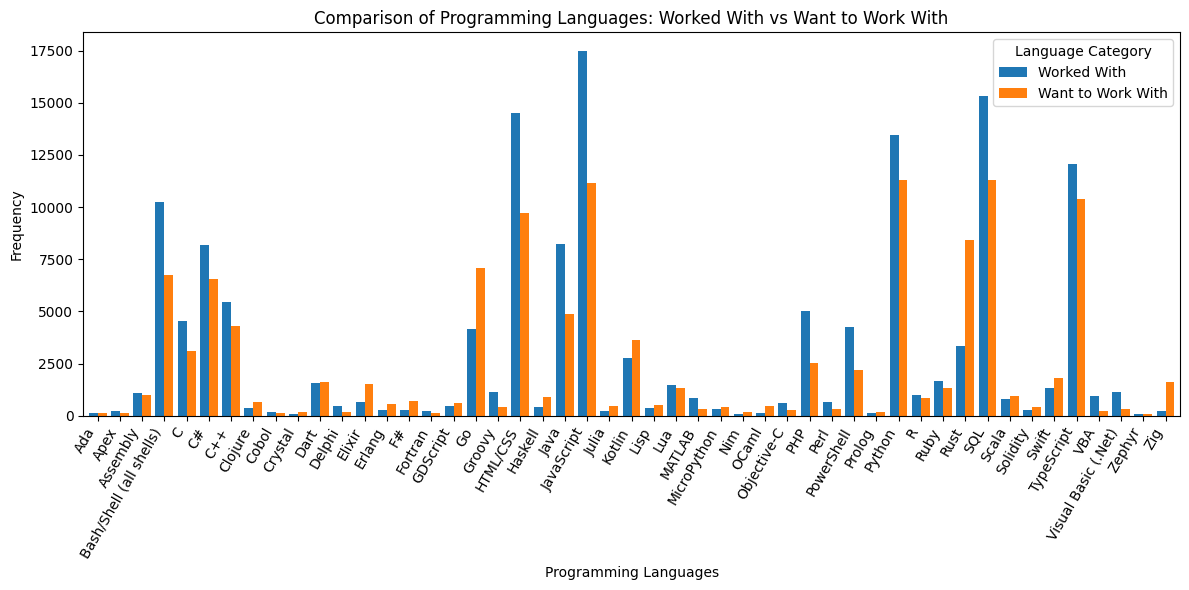

In [40]:
## Write your code here

# Split the 'LanguageHaveWorkedWith' and 'LanguageWantToWorkWith' columns into individual languages
worked_with = df['LanguageHaveWorkedWith'].dropna().str.split(';').explode()
to_work_with = df['LanguageWantToWorkWith'].dropna().str.split(';').explode()

# Count the frequency of languages in both columns
worked_with_counts = worked_with.value_counts()
to_work_with_counts = to_work_with.value_counts()

# Merge the counts into a single DataFrame
languages = pd.DataFrame({
    'Worked With': worked_with_counts,
    'Want to Work With': to_work_with_counts
}).fillna(0) 

# Create a grouped bar chart
languages.plot(kind='bar', figsize=(12, 6), width=0.8)

# Labels and title
plt.title('Comparison of Programming Languages: Worked With vs Want to Work With')
plt.xlabel('Programming Languages')
plt.ylabel('Frequency')
plt.xticks(rotation=60, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Language Category')

# Display the plot
plt.tight_layout()
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


12       United States of America
15                    Switzerland
18                        Germany
22                        Ireland
24                          Italy
                   ...           
65178                      Israel
65241    United States of America
65265                       India
65351                       Benin
65412                       Italy
Name: Country, Length: 27568, dtype: object


<Figure size 1800x800 with 0 Axes>

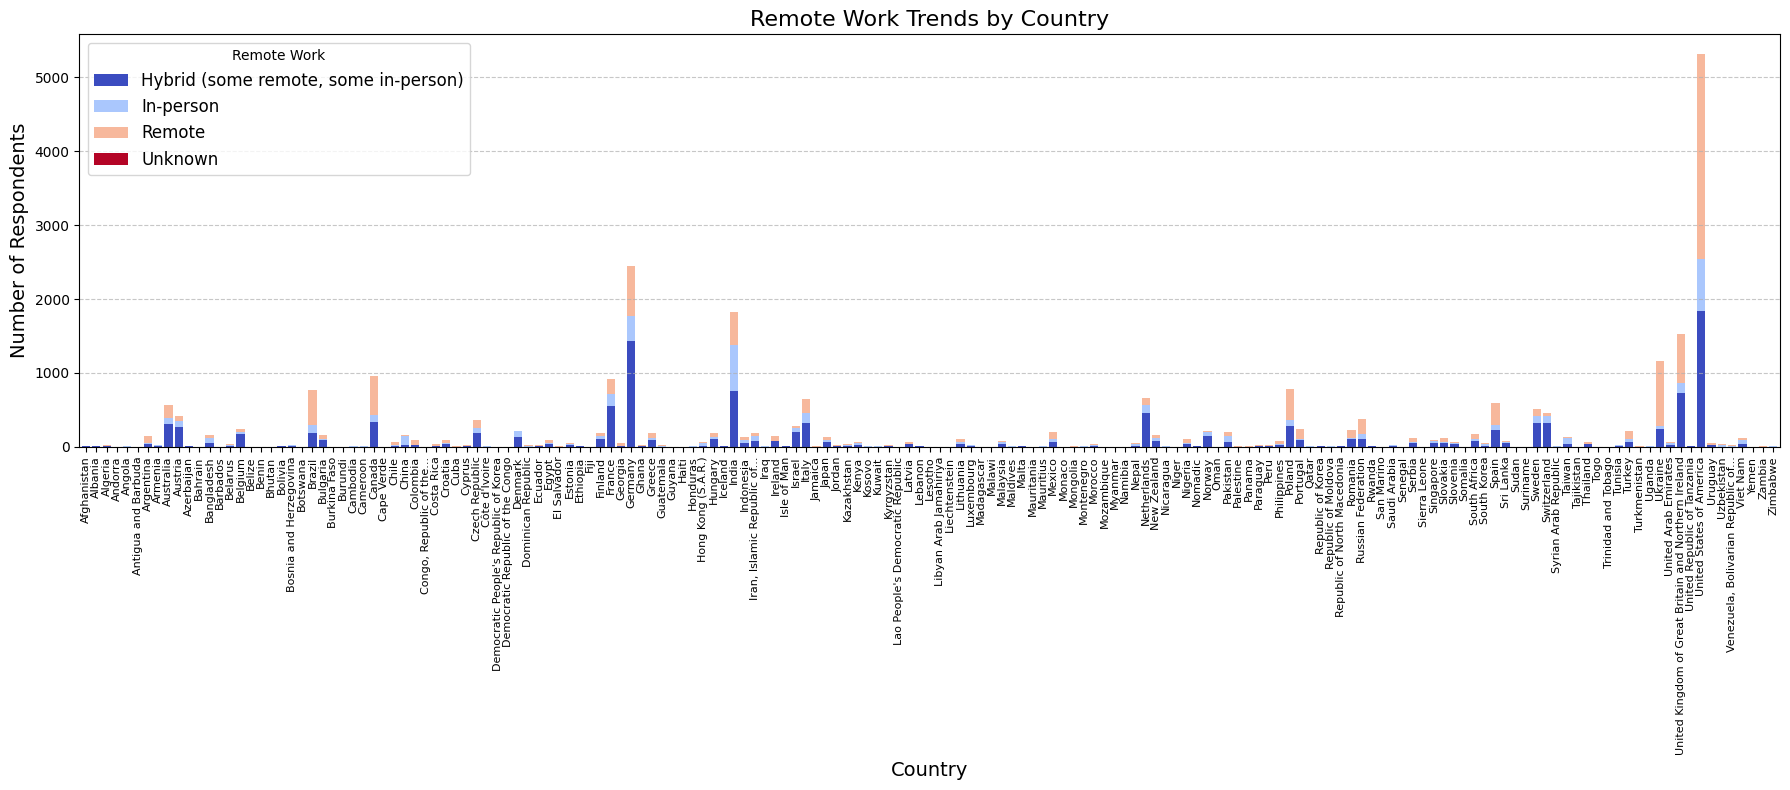

In [41]:
## Write your code here

print(df['Country'])

# Group the data and count occurrences of RemoteWork by Country
remote_work_counts = df.groupby(['Country', 'RemoteWork']).size().unstack()

# Fill NaN values with 0 to ensure numeric data for plotting
remote_work_counts = remote_work_counts.fillna(0)

# Increase figure size to fit all countries
plt.figure(figsize=(18, 8))

# Plot the grouped bar chart
remote_work_counts.plot(kind='bar', stacked=True, colormap='coolwarm', width=0.8, figsize=(18, 8))

# Formatting the plot
plt.title('Remote Work Trends by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=90, fontsize=8)  # Rotate country labels for readability
plt.legend(title='Remote Work', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better visibility
plt.tight_layout()

# Show the plot
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience



- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [49]:
## Write your code here

from scipy.stats import pearsonr, spearmanr

# Calculate the Pearson correlation coefficient
pearson_corr, _ = pearsonr(df['JobSat'], df['YearsCodePro'])
print(f"Pearson correlation coefficient: {pearson_corr:.3f}")

# Calculate the Spearman correlation coefficient
spearman_corr, _ = spearmanr(df['JobSat'], df['YearsCodePro'])
print(f"Spearman correlation coefficient: {spearman_corr:.3f}")


Pearson correlation coefficient: 0.103
Spearman correlation coefficient: 0.121


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


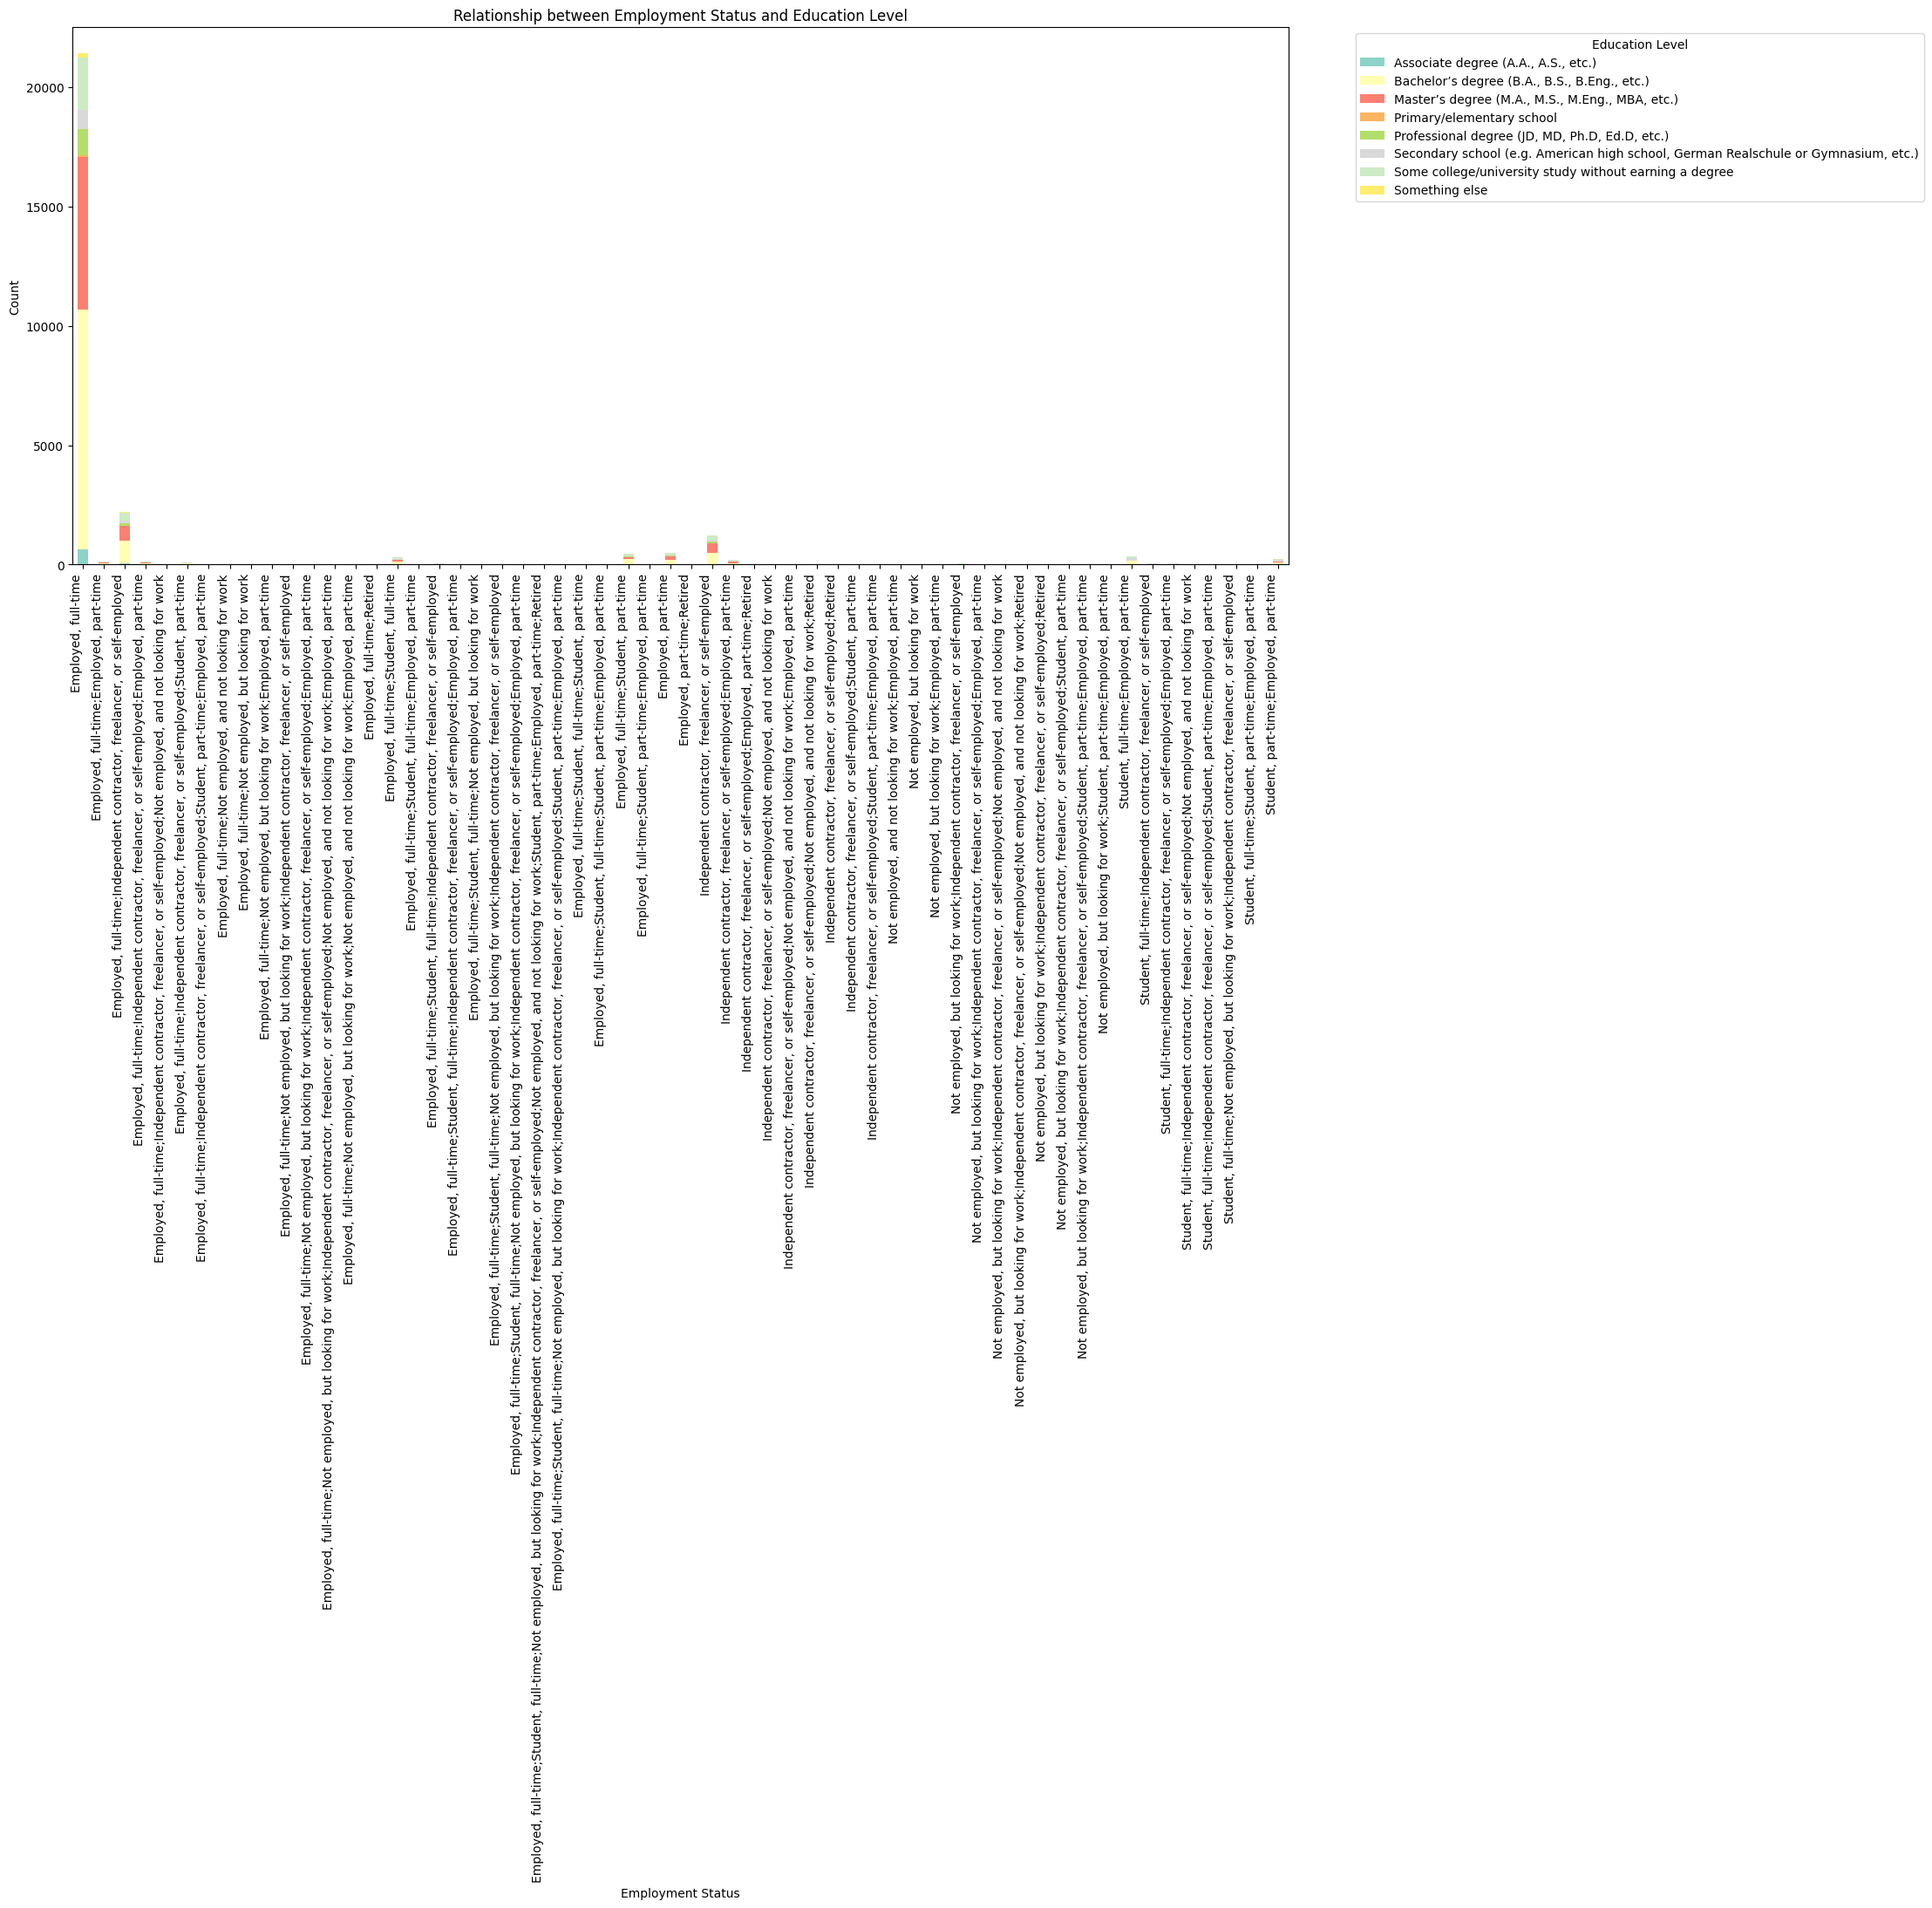

In [52]:
## Write your code here

# Create a cross-tabulation to show the relationship between Employment and EdLevel
cross_tab = pd.crosstab(df['Employment'], df['EdLevel'])

# Plot a stacked bar chart to visualize the relationship
cross_tab.plot(kind='bar', stacked=True, figsize=(18,8), colormap='Set3')

# Labels and title
plt.title('Relationship between Employment Status and Education Level')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot

plt.show()


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [54]:
## Write your code here

df.to_csv('cleaned_dataset.csv', index=False)

print("Cleaned dataset has been saved to 'cleaned_dataset.csv'.")

Cleaned dataset has been saved to 'cleaned_dataset.csv'.


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
